In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
dataset = pd.read_csv('/content/Salary_dataset.csv')


In [4]:
dataset

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [5]:
dataset.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [7]:
dataset.shape

(30, 3)

In [8]:
df = dataset.drop("Unnamed: 0", axis = 1)

In [9]:
df.shape
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [10]:
X = df.drop('Salary', axis=1) #YearsExperience
X

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [11]:
y = df.Salary #Salary
y

,Salary
0,39344.0
1,46206.0
2,37732.0
3,43526.0
4,39892.0
5,56643.0
6,60151.0
7,54446.0
8,64446.0
9,57190.0


In [13]:
#Spilting dataset into training set for Salary(y) and YearsExperience(X), testing set for Salary(y) and YearsExperience(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
print("Training X and y:")
print(X_train.shape)
print(y_train.shape)
print("Testing X and y:")
print(X_test.shape)
print(y_test.shape)

Training X and y:
(21, 1)
(21,)
Testing X and y:
(9, 1)
(9,)


In [15]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [16]:
#Predicted Salary
y_pred = LR.predict(X_test)
y_pred

array([ 40818.78327049, 123189.08258899,  65155.46261459,  63283.41035735,
       115700.87356004, 108212.66453108, 116636.89968866,  64219.43648597,
        76387.77615802])

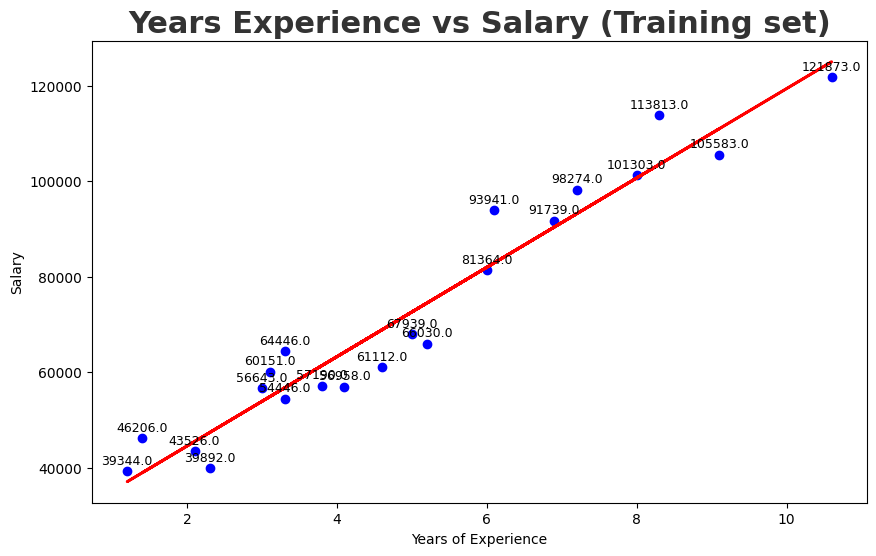

In [17]:
# Visualize the Training Set

plt.figure(figsize=(10, 6))

actual_color = 'blue'
predicted_color = 'red'

plt.scatter(X_train, y_train, color=actual_color, label='Actual Salary') #scatter plot for actual data (trainig)
plt.plot(X_train, LR.predict(X_train), color=predicted_color,  linewidth=2, label='Predicted Salary') #linear graph for predicted data

plt.title('Years Experience vs Salary (Training set)', fontsize=22, fontweight='bold', color='#333333')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

for i, txt in enumerate(y_train):
    plt.annotate(f'{txt}', (X_train.values[i], y_train.values[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='black')



plt.show()

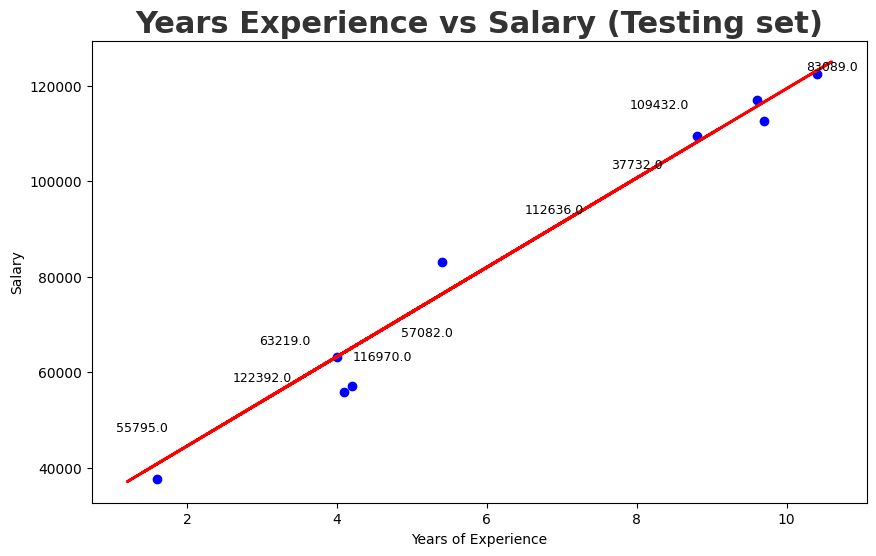

In [19]:
# Visualize the Testing Set

plt.figure(figsize=(10, 6))

actual_color = 'blue'
predicted_color = 'red'

plt.scatter(X_test, y_test, color=actual_color, label='Actual Salary') #scatter plot for actual data (testing)
plt.plot(X_train, LR.predict(X_train), color=predicted_color,  linewidth=2, label='Predicted Salary') #linear graph for predicted data

plt.title('Years Experience vs Salary (Testing set)', fontsize=22, fontweight='bold', color='#333333')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

for i, txt in enumerate(y_test):
    plt.annotate(f'{txt}', (X_train.values[i], y_train.values[i]), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='black')



plt.show()

In [22]:
#Prediction for the salary from years of experience

def predict_salary(years_of_experience):
  return LR.predict([[years_of_experience]])[0] #[[years_of_experience]] --> to make it into a 2D array, [0] --> first value

years = float(input("Enter years of experience: "))

predicted_salary = predict_salary(years)

print(f"Predicted salary for {years} years of experience: ${predicted_salary:.2f}")


Enter years of experience: 45
Predicted salary for 45.0 years of experience: $447054.12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
import joblib

# Save the trained model to a file
joblib.dump(LR, 'salary_prediction_model.pkl')


['salary_prediction_model.pkl']

In [24]:
load_regressor = joblib.load('salary_prediction_model.pkl')

In [27]:
amount = float(input("Enter years of experience: "))
predicted_salary = load_regressor.predict([[amount]])
print(f"Predicted Salary: ${predicted_salary[0]:.2f}")

Enter years of experience: 30
Predicted Salary: $306650.20


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
